In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt



# Regressão linear simples

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/PI DATA SCIENCE/MÓDULO 4/DATASET/Dummy Data HSS.csv')

In [ ]:
df

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181
...,...,...,...,...,...
4567,26.0,4.472360,0.717090,Micro,94.685866
4568,71.0,20.610685,6.545573,Nano,249.101915
4569,44.0,19.800072,5.096192,Micro,163.631457
4570,71.0,17.534640,1.940873,Macro,253.610411


In [ ]:
# informações do dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4562 non-null   float64
 1   Radio         4568 non-null   float64
 2   Social Media  4566 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4566 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB


In [ ]:
# Estatística descritiva
df.describe()

,TV,Radio,Social Media,Sales
count,4562.000000,4568.000000,4566.000000,4566.000000
mean,54.066857,18.160356,3.323956,192.466602
std,26.125054,9.676958,2.212670,93.133092
min,10.000000,0.000684,0.000031,31.199409
25%,32.000000,10.525957,1.527849,112.322882
50%,53.000000,17.859513,3.055565,189.231172
75%,77.000000,25.649730,4.807558,272.507922
max,100.000000,48.871161,13.981662,364.079751


In [ ]:
# Contando os dados missing? 
df.isnull().sum()

TV              10
Radio            4
Social Media     6
Influencer       0
Sales            6
dtype: int64

In [ ]:
# Preenchendo os valores nulos com a média

df_preenchido = df.fillna(df.mean())

In [ ]:
df_preenchido

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181
...,...,...,...,...,...
4567,26.0,4.472360,0.717090,Micro,94.685866
4568,71.0,20.610685,6.545573,Nano,249.101915
4569,44.0,19.800072,5.096192,Micro,163.631457
4570,71.0,17.534640,1.940873,Macro,253.610411


In [ ]:
# df_preeenchido com os dados ausentes preenchido com a média
df_preenchido.isnull().sum()

TV              0
Radio           0
Social Media    0
Influencer      0
Sales           0
dtype: int64

In [ ]:
df_preenchido.corr()

,TV,Radio,Social Media,Sales
TV,1.000000,0.866885,0.527010,0.996652
Radio,0.866885,1.000000,0.606793,0.867369
Social Media,0.527010,0.606793,1.000000,0.528121
Sales,0.996652,0.867369,0.528121,1.000000


In [ ]:
df_preenchido.corr()["Sales"].sort_values(ascending=False)

Sales           1.000000
TV              0.996652
Radio           0.867369
Social Media    0.528121
Name: Sales, dtype: float64

In [ ]:
# crie duas variáveis, X e y, respectivamente os arrays das features total bill e tip

X = df_preenchido["TV"]

y = df_preenchido["Sales"]

In [ ]:
# 1) Importe a classe do estimador que se deseja treinar

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X

0       16.0
1       13.0
2       41.0
3       83.0
4       15.0
        ... 
4567    26.0
4568    71.0
4569    44.0
4570    71.0
4571    42.0
Name: TV, Length: 4572, dtype: float64

In [ ]:
X_train

2789    46.0
501     21.0
794     41.0
2519    42.0
1954    79.0
        ... 
4426    45.0
466     66.0
3092    82.0
3772    93.0
860     69.0
Name: TV, Length: 3657, dtype: float64

In [ ]:
X_test

538     26.0
1822    62.0
534     29.0
2119    92.0
561     99.0
        ... 
744     68.0
733     35.0
2647    70.0
4149    70.0
3819    71.0
Name: TV, Length: 915, dtype: float64

In [ ]:
np.array(X_train).reshape(-1, 1)

array([[46.],
       [21.],
       [41.],
       ...,
       [82.],
       [93.],
       [69.]])

In [ ]:
#4) Treine o modelo, usando os dados de treino. 
# Este é um modelo simples, não tem muitos hiperparâmetros relevantes
# obs: é necessário dar um reshape nas features!

modelo = estimador.fit(np.array(X_train).reshape(-1, 1), y_train)

In [ ]:
# pegue o intercet. Dica: veja os atributos do modelo treinado!

b_0 = modelo.intercept_

b_0

0.2232524557588249

In [ ]:
# peque o coeficiente angular. Dica: veja os atributos do modelo treinado!

b_1 = modelo.coef_[0]

b_1

3.556558069437122

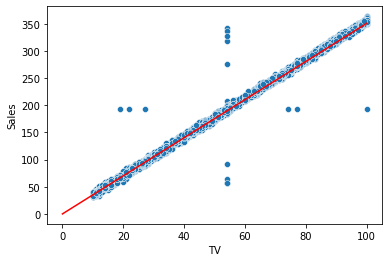

In [ ]:
# faça um scatterplot da fgeature pelo target
sns.scatterplot(data=df_preenchido, x="TV", y="Sales")

# faça um plot da reta do modelo
# crie um array com os valores de x. dica:  use o range aproximado da variável GrLivArea
# crie um array de y com a equação da reta usando os coeficientes encontrados
x = np.linspace(0, 100, 10000)
y = modelo.intercept_ + modelo.coef_[0]*x
plt.plot(x, y, color="red")


# Fazendo uma previsão

In [ ]:
x = 10
y = modelo.intercept_ + modelo.coef_[0]*x

print("O valor total em vendas será:", y)

O valor total em vendas será: 35.788833150130046


# Agora algumas previsões

In [ ]:
np.array(X_test).reshape(-1, 1)

array([[ 26.        ],
       [ 62.        ],
       [ 29.        ],
       [ 92.        ],
       [ 99.        ],
       [ 74.        ],
       [ 99.        ],
       [ 39.        ],
       [ 74.        ],
       [ 15.        ],
       [ 38.        ],
       [ 33.        ],
       [ 88.        ],
       [ 54.        ],
       [ 44.        ],
       [ 84.        ],
       [ 70.        ],
       [ 32.        ],
       [ 84.        ],
       [ 67.        ],
       [ 53.        ],
       [ 98.        ],
       [ 32.        ],
       [ 27.        ],
       [ 45.        ],
       [ 99.        ],
       [ 16.        ],
       [ 47.        ],
       [ 64.        ],
       [100.        ],
       [ 72.        ],
       [ 46.        ],
       [ 98.        ],
       [ 78.        ],
       [ 18.        ],
       [ 14.        ],
       [ 23.        ],
       [ 90.        ],
       [ 34.        ],
       [ 69.        ],
       [ 77.        ],
       [ 42.        ],
       [ 43.        ],
       [ 46

In [ ]:
X_test

538     26.0
1822    62.0
534     29.0
2119    92.0
561     99.0
        ... 
744     68.0
733     35.0
2647    70.0
4149    70.0
3819    71.0
Name: TV, Length: 915, dtype: float64

In [ ]:
# 5) Use o modelo treinado para fazer previsões usando os dados de teste 

y_pred = modelo.predict(np.array(X_test).reshape(-1, 1))

In [ ]:
pd.Series(y_pred)

0       92.693762
1      220.729853
2      103.363436
3      327.426595
4      352.322501
          ...    
910    242.069201
911    124.702785
912    249.182317
913    249.182317
914    252.738875
Length: 915, dtype: float64

In [ ]:
y_test

538      90.054222
1822    222.741668
534     102.774791
2119    328.239378
561     351.807328
           ...    
744     244.865923
733     130.478750
2647    251.403637
4149    253.172404
3819    250.151755
Name: Sales, Length: 915, dtype: float64

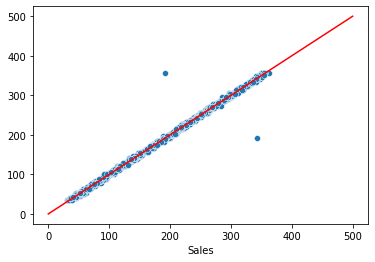

In [ ]:
# faça um scatterplot do valor predito pelo valor real
x = np.linspace(0,500,10000)

plt.plot(x,x,color='red')

sns.scatterplot(x=y_test, y=y_pred)

In [ ]:
# r^2 
from sklearn import metrics

metrics.r2_score(y_test, y_pred)

0.992437541516548

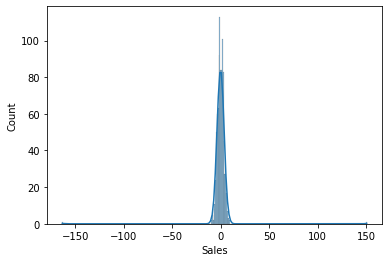

In [ ]:
# dê uma olhada na distribuição dos resíduos
res = y_test - y_pred

sns.histplot(x=res, kde=True)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 2.7798659434873505
MSE: 63.11725462816907
RMSE: 7.944636846840079


# Regressão linear Múltipla

# Engenharia das features

In [ ]:
# Transformando as variáveis categóricas em numéricas
dummy_features = pd.get_dummies(df_preenchido)

In [ ]:
dummy_features

,TV,Radio,Social Media,Sales
0,16.0,6.566231,2.907983,54.732757
1,13.0,9.237765,2.409567,46.677897
2,41.0,15.886446,2.913410,150.177829
3,83.0,30.020028,6.922304,298.246340
4,15.0,8.437408,1.405998,56.594181
...,...,...,...,...
4567,26.0,4.472360,0.717090,94.685866
4568,71.0,20.610685,6.545573,249.101915
4569,44.0,19.800072,5.096192,163.631457
4570,71.0,17.534640,1.940873,253.610411


In [ ]:
dummy_features.corr()

,TV,Radio,Social Media,Sales
TV,1.000000,0.866885,0.527010,0.996652
Radio,0.866885,1.000000,0.606793,0.867369
Social Media,0.527010,0.606793,1.000000,0.528121
Sales,0.996652,0.867369,0.528121,1.000000


In [ ]:
dummy_features.corr()["Sales"].sort_values(ascending=False)

Sales           1.000000
TV              0.996652
Radio           0.867369
Social Media    0.528121
Name: Sales, dtype: float64

Intercepto: 0.05524906631242743
Coeficienter angular: [3.5112574  0.13177259 0.06802915]

####################################################



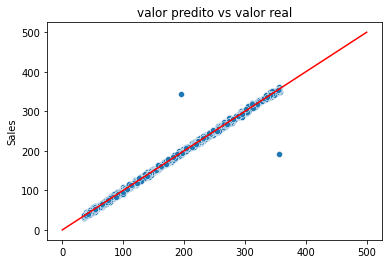

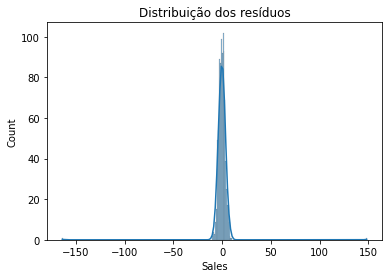


####################################################


Métricas de avaliação:
R^2: 0.9924495666736649
MAE: 2.8263398584546615
MSE: 63.016891114722284
RMSE: 7.9383179020950205


In [ ]:
# de resto, pode seguir como tínhamos antes!

dummy_features.select_dtypes(include=[np.number])
dummy_features.dropna(axis="columns", how="any")

X = dummy_features.drop(columns=["Sales"])
y = dummy_features["Sales"]

# 1)
from sklearn.linear_model import LinearRegression

# 2)
estimador = LinearRegression()

# 3)
from sklearn.model_selection import train_test_split
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

# 4)
modelo = estimador.fit(X_treino, y_treino)

print("Intercepto:", modelo.intercept_)
print("Coeficienter angular:", modelo.coef_)

print("\n####################################################\n")

# 5)
predictions = modelo.predict(X_teste)
plt.plot(np.linspace(0,500,10000),np.linspace(0,500,10000),color = 'red')
plt.title("valor predito vs valor real")
sns.scatterplot(x=predictions, y=y_teste)
plt.show()

plt.title("Distribuição dos resíduos")
sns.histplot(y_teste-predictions, kde=True)
plt.show()

print("\n####################################################\n")

print("\nMétricas de avaliação:")

# 6)
from sklearn import metrics

print('R^2:', metrics.r2_score(y_test, predictions))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))